# 텍스트 전처리

NLTK는 구텐베르크 프로젝트(저작권 만료된 영어소설 제공) 중 일부를 제공

In [1]:
import nltk

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [3]:
# 파일 제목 가져오기

from nltk.corpus import gutenberg

file_names = gutenberg.fileids()
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [4]:
# 이상한 나라의 앨리스 읽어오기

doc_alice = gutenberg.open('carroll-alice.txt').read()
print('사용된 문자의 수:', len(doc_alice))
print(doc_alice[:1000])     # 앞의 1000자만 출력

사용된 문자의 수: 144395
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed q

**토큰화 (Tokenizing) 진행**

단어 토큰화 vs 정규표현식 토큰화<br>
괄호, 구두점 등이 있어 정규표현식 토큰화를 사용한다.

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from nltk.tokenize import word_tokenize

word_tokens_alice = word_tokenize(doc_alice)
print('토큰의 개수:', len(word_tokens_alice))
print('Token sample:')
print(word_tokens_alice[:20])

토큰의 개수: 33310
Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [7]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']{1,}") 

reg_tokens_alice = tokenizer.tokenize(doc_alice)
print('토큰의 개수:', len(reg_tokens_alice))
print('Token sample:')
print(reg_tokens_alice[:20])

토큰의 개수: 27803
Token sample:
["Alice's", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', 'CHAPTER', 'I', 'Down', 'the', 'Rabbit', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very']


**어간 추출 (stemming) vs 표제어 추출 (lemmatization)**

사용 단어의 빈도를 확인할 것이기 때문에 실제로 사용은 하지 않는다.

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
# 포터 스태밍

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stem_tokens_alice = [stemmer.stem(token) for token in reg_tokens_alice]
print('어간 추출 후 토큰의 개수:', len(stem_tokens_alice))
print('Token sample:')
print(stem_tokens_alice[:20])

어간 추출 후 토큰의 개수: 27803
Token sample:
["alice'", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', 'chapter', 'I', 'down', 'the', 'rabbit', 'hole', 'alic', 'wa', 'begin', 'to', 'get', 'veri']


In [10]:
# 표제어 추출

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lem_tokens_alice = [lemmatizer.lemmatize(token) for token in reg_tokens_alice]
print('표제어 추출 후 토큰의 개수:', len(lem_tokens_alice))
print('Token sample:')
print(lem_tokens_alice[:20])

표제어 추출 후 토큰의 개수: 27803
Token sample:
["Alice's", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', 'CHAPTER', 'I', 'Down', 'the', 'Rabbit', 'Hole', 'Alice', 'wa', 'beginning', 'to', 'get', 'very']


**불용어 제거**

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english'))     # 반복이 되지 않도록 set으로 변환

result_alice = [word for word in reg_tokens_alice if word not in english_stops]     # stopwords를 제외한 단어들만으로 list를 생성

print('불용어 제거후 토큰의 개수:', len(result_alice))
print('Token sample:')
print(result_alice[:20])

불용어 제거후 토큰의 개수: 15324
Token sample:
["Alice's", 'Adventures', 'Wonderland', 'Lewis', 'Carroll', '1865', 'CHAPTER', 'I', 'Down', 'Rabbit', 'Hole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice']


**품사 태깅을 이용하여 단어 선별**

의미가 있을 법한 명사, 고유명사, 동사, 형용사, 부사만 선택

In [13]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
my_tag_set = ['NN', 'NNP', 'RB', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

# 딕셔너리로 각 단어의 빈도수 체크
alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('단어의 개수:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)    # key 값 기준으로 내림차순 정렬

print("빈도수 상위 20개 단어:")
for key in sorted_word_count[:20]:  # 빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

단어의 개수: 2260
빈도수 상위 20개 단어:
'said': 456, 'Alice': 385, 'little': 125, 'went': 83, 'time': 68, 'Queen': 66, 'began': 58, 'King': 57, 'Turtle': 57, 'way': 56, 'Mock': 56, 'thought': 55, 'Gryphon': 55, 'Hatter': 54, 'quite': 53, 'much': 51, 'thing': 49, 'head': 47, 'voice': 46, 'got': 44, 

# 단어 빈도 그래프

`matplotlib` 사용

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

모든 단어에 대해 그래프를 그리면 그래프 해석이 힘들 수 있으며, 어떤 단어의 빈도수가 높은지 단어를 표시하려 하면 가독성이 떨어지며, 2^16 pixel을 넘어가게 되면 에러가 발생한다.

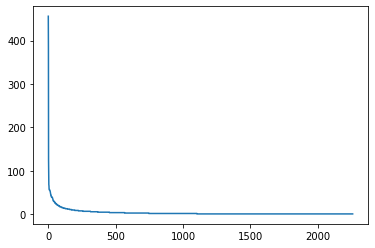

In [16]:
w = [alice_word_count[key] for key in sorted_word_count] # 정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성
plt.plot(w)
plt.show()

한계점으로 인해 빈도가 높은 상위 몇개의 단어만 그래프화하여 볼 수 있다.

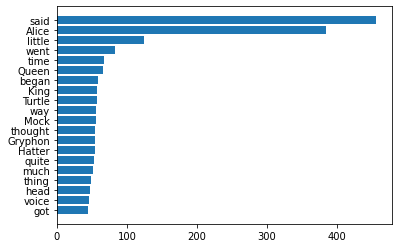

In [17]:
n = sorted_word_count[:20][::-1]    # 빈도수 상위 20개의 단어를 추출하여 역순으로 정렬
w = [alice_word_count[key] for key in n]
plt.barh(range(len(n)),w,tick_label=n)  # 수평 막대그래프 (단어의 가독성을 위함)
plt.show()

# 워드클라우드

`matplotlib`와 `wordcloud` 사용

In [ ]:
!pip install wordcloud

책 원문의 단어 빈도 수

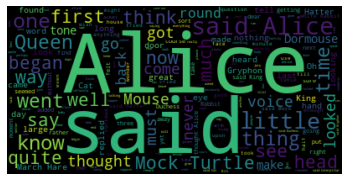

In [19]:
from wordcloud import WordCloud

# 워드 클라우드 이미지 생성 (내부 토큰화 작업)
wordcloud = WordCloud().generate(doc_alice)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear') #이미지를 출력
plt.show()

그래프에서 구한 단어 빈도 수

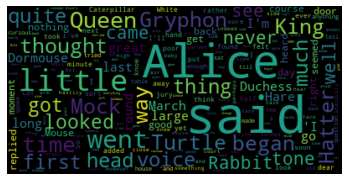

In [21]:
# 워드 클라우드 이미지 생성 (내부 토큰화 작업은 하지 않는다.)
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(alice_word_count)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

이미지 위에 워드클라우드 출력

In [23]:
import numpy as np
from PIL import Image

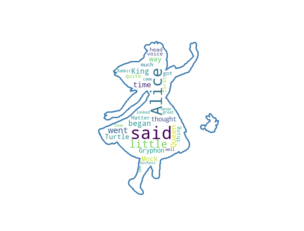

In [22]:
alice_mask = np.array(Image.open("alice_mask.png"))     # 배경이미지를 불러와서 numpy array로 변환
wc = WordCloud(background_color="white",    # 배경색 지정
               max_words=30,    # 출력할 최대 단어 수
               mask=alice_mask,     # 배경으로 사용할 이미지
               contour_width=3,     # 테두리선의 크기
               contour_color='steelblue')   # 테두리선의 색

wc.generate_from_frequencies(alice_word_count)  # 워드 클라우드 생성

wc.to_file("alice.png")     # 결과를 이미지 파일로 저장

# 화면에 결과를 출력
plt.figure()
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()